## Redes neuronales

![](https://raw.githubusercontent.com/igomezv/MACS_2021_neural_networks/main/figures/ANN.png)

![](https://raw.githubusercontent.com/igomezv/MACS_2021_neural_networks/main/figures/ANN.png)


### Tipos de funciones de activación:
Fuente: https://mlfromscratch.com/activation-functions-explained/#/
![title](https://mlfromscratch.com/content/images/2019/12/activation-functions.gif)


### Descenso del gradiente (intuición)

- La deducción no es propósito de esta notebook, pero cada nuevo paso en busca de la minimización de la función de costo, obedece la siguiente regla:

$ v -> v' = v - \eta \nabla C$, donde $v$ es $f(w, b)$ y $\eta$ la tasa de aprendizaje (tamaño de paso, learning rate)

- Se da un paso en dirección opuesta al gradiente hasta minimizar la función de costo.

- Se le llama *backpropagation* al algoritmo que realiza esto iterativamente desde la última capa hasta la primera.

Fuente: https://kevinbinz.com/2019/05/26/intro-gradient-descent/

![title](https://kevinbinz.files.wordpress.com/2019/05/dualspace_explore.gif)

- Se quiere encontrar (x,y) tal que sea un mínimo en la superficie (función de costo).

Fuente: https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

![title](https://miro.medium.com/max/819/1*hUd744hDEEGx0-ypWGhrkw.gif)


![title](https://raw.githubusercontent.com/igomezv/MACS_2021_ML_basics_neural_networks/main/figures/approxTheorem.png)



### Algunos tipos de redes neuronales
Fuente: https://www.asimovinstitute.org/neural-network-zoo/
<div>
    <img src="https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019.png", width="500">
</div>

## 1. Construyamos una red neuronal configurable con keras

In [1]:
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

#### Analicemos si una red neuronal puede aprender las siguientes tres funciones:

* $line(x) = 2x+3$
* $quadratic(x) = x^2 +2$
* $quadtres(x_1,x_2,x_3) = x_1^2 + 2x_2 + x_3$

In [2]:
def line(x):
    return 2*x + 3 + 0.05 * np.random.rand()

def quadratic(x):
    return x**2 + 2 + 0.001 * np.random.rand()

def quadtres(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i, 0]**2 + 2*x[i, 1] + x[i, 2]
    return y

In [5]:
# Descomentar función para generar datos
# fn = line
fn = quadratic
# fn = quadtres

# Seleccionar número de puntos para el dataset
npoints = 100

# Generar X
## para line y quadratic
X = np.random.rand(npoints)
## para quadtres
# X = np.random.rand(npoints, 3)

# Generar Y
Y = fn(X)

# Ver tabla de datos
## para line y quadratic
data =pd.DataFrame(zip(X,Y), columns=['x', 'y'])
## para quadtres
# data =pd.DataFrame(zip(X[:,0], X[:,1], X[:,2], Y), columns=['$x_1$', '$x_2$', '$x_3$', 'y'])
data.head(2)

,x,y
0,0.643364,2.414578
1,0.048857,2.003047


In [20]:
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
scaler.fit(X.reshape(-1,1))

X_train, X_val = train_test_split(X, train_size=0.8, shuffle=True, random_state=1)
Y_train, Y_val = train_test_split(Y, train_size=0.8, shuffle=True, random_state=1)
X_train = scaler.transform(X_train.reshape(-1,1))
X_val = scaler.transform(X_val.reshape(-1,1))


In [23]:


# Red neuronal
model = K.models.Sequential()
# Hidden layers
topology = [1,200,2]

for i, nodes in enumerate(topology):
    if i == 0:
        model.add(K.layers.Dense(topology[1], input_dim=topology[0], activation='relu'))
    elif i < len(topology)-2:
        model.add(K.layers.Dense(topology[i+1], activation='relu'))
    else:
        model.add(K.layers.Dense(topology[i], activation='linear'))
optimizer = K.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()


callbacks = [K.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                       min_delta=0.0,
                                       patience=2,
                                       restore_best_weights=True)]

    

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 200)               400       
                                                                 
 dense_8 (Dense)             (None, 200)               40200     
                                                                 
 dense_9 (Dense)             (None, 2)                 402       
                                                                 
Total params: 41,002
Trainable params: 41,002
Non-trainable params: 0
_________________________________________________________________


In [25]:

epochs=100
bs = 4

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                                  epochs=epochs, batch_size=bs,
                                  callbacks=callbacks, verbose=0)

In [26]:
nlayer = 1
weights, biases = model.layers[nlayer].get_weights()

In [27]:
model.predict(X_val)

1/1 [==============================] - 0s 62ms/step


array([[2.7352738, 2.73338  ],
       [2.3784   , 2.375995 ],
       [2.2544043, 2.2564917],
       [2.6243575, 2.621677 ],
       [2.3973658, 2.3950477],
       [2.030843 , 2.02971  ],
       [2.9355943, 2.9377463],
       [2.068285 , 2.0697842],
       [2.4533434, 2.4519858],
       [2.1155236, 2.1164656],
       [2.12643  , 2.1275249],
       [2.0088642, 2.0071332],
       [2.5149176, 2.5141048],
       [2.0281892, 2.02688  ],
       [2.0082202, 2.0063062],
       [2.3685029, 2.3661418],
       [2.3923278, 2.3900604],
       [2.148805 , 2.1490574],
       [2.327493 , 2.326286 ],
       [2.4351306, 2.4332676]], dtype=float32)

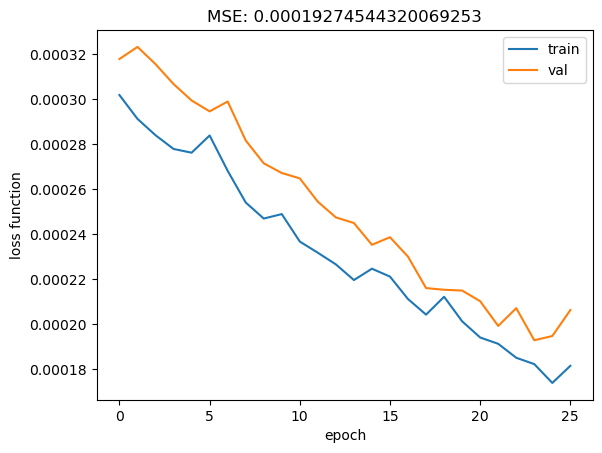

In [32]:
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='validation set')
mse = np.min(history.history['val_loss'])
plt.title('MSE: {}'.format(mse))
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')        

In [ ]:
# new_vector = np.array([0.7, 0.5, 0.6]).reshape(1,3)
new_vector = np.array([0.7])
prediction = network.predict(new_vector)


print("Valor real: {}".format(float(fn(new_vector))))
print("Predicción: {}".format(float(prediction)))

## 